In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import os
from fastai.vision import *
from fastai.metrics import error_rate

set the batch size, in case needed for GPUs with not much memory

In [2]:
BATCH_SIZE = 64

## Looking at the data
Using the Oxford-IIIT Pet Dataset, with **12 cat breeds** and **25 dog breeds**

In [4]:
_path = untar_data(URLs.PETS); _path

PosixPath('/home/gregor/.fastai/data/oxford-iiit-pet')

List what contents are in the path

In [5]:
_path.ls()

[PosixPath('/home/gregor/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/home/gregor/.fastai/data/oxford-iiit-pet/images')]

and create some paths to grab the data

In [9]:
_pathAnnotations = os.path.join( str( _path ), 'annotations' )
_pathImages = os.path.join( str( _path ), 'images' )

print( 'anotations path: ', _pathAnnotations )
print( 'images path: ', _pathImages )

anotations path:  /home/gregor/.fastai/data/oxford-iiit-pet/annotations
images path:  /home/gregor/.fastai/data/oxford-iiit-pet/images


In [11]:
_fnames = get_image_files( _pathImages )
_fnames[:5]

[PosixPath('/home/gregor/.fastai/data/oxford-iiit-pet/images/havanese_92.jpg'),
 PosixPath('/home/gregor/.fastai/data/oxford-iiit-pet/images/great_pyrenees_21.jpg'),
 PosixPath('/home/gregor/.fastai/data/oxford-iiit-pet/images/basset_hound_117.jpg'),
 PosixPath('/home/gregor/.fastai/data/oxford-iiit-pet/images/Bengal_123.jpg'),
 PosixPath('/home/gregor/.fastai/data/oxford-iiit-pet/images/Persian_89.jpg')]

In [13]:
# set random seed
np.random.seed( 2 )
# and create a regex
_regexLabels = r'/([^/]+)_\d+.jpg$'

Create an ImageDataBunch using image path to create the
image data, and the regex to extract the labels

In [17]:
_dataBunch = ImageDataBunch.from_name_re( _pathImages, 
                                          _fnames, 
                                          _regex,
                                          ds_tfms = get_transforms(),
                                          size = 224,
                                          bs = BATCH_SIZE).normalize( imagenet_stats )

and show some of the data from the databunch object

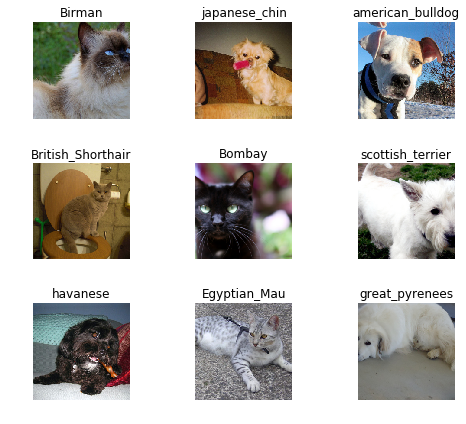

In [18]:
_dataBunch.show_batch( rows = 3, figsize = (7, 6) )

The databunch has some info about the classes, which can be extracted with data.classes and data.c

In [21]:
print( 'Labels' )
print( _dataBunch.classes )
print( 'num classes: ', len( _dataBunch.classes ) )
print( 'num classes: ', _dataBunch.c )

Labels
['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']
num classes:  37
num classes:  37


## Creating a model using high-level factory
Here we use a CNN based on the resnet34 architecture (resnet50 might not enter in our GPU). We make use of the high-level factory methods from fastai, namely the **create_cnn** method

In [26]:
## # the documentation of the create_cnn function
## doc( create_cnn )

In [27]:
# we create a learner based using the previous factory method
_learner = create_cnn( _dataBunch, models.resnet34, metrics = error_rate )
# and see the model structure
_learner.model

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /home/gregor/.torch/models/resnet34-333f7ec4.pth
87306240it [01:15, 1153295.32it/s]


Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

re-train the model (resnet34 weights trained on imagenet were downloaded previously) by training only on the last layers(?)

In [29]:
_learner.fit_one_cycle( 4 )

epoch,train_loss,valid_loss,error_rate
1,1.399384,0.333670,0.102165
2,0.563617,0.248580,0.079161
3,0.327249,0.221312,0.069012
4,0.253925,0.211857,0.064953


In [30]:
_learner.save( 'stage-1' )